# Знакомство с датасетом

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [56]:
X = pd.read_csv('X_train.csv')
y = pd.read_csv('y_train.csv')

Оценим баланс классов.

In [57]:
y.value_counts()

target
0         98078
1          7031
dtype: int64

Посмотрим из чего состоит датасет.

In [58]:
print(X.shape)
X.head()

(105109, 10)


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


Разделим датасет на train и test, а также добавим в X колонку y, чтобы можно было удобно чистить датасет.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train['Target'] = y_train

# Анализ и чистка фичей тренировочного датасета

Рассмотрим, какие корреляции есть в фичах, и как они сами коррелируют с результатом.

<AxesSubplot:>

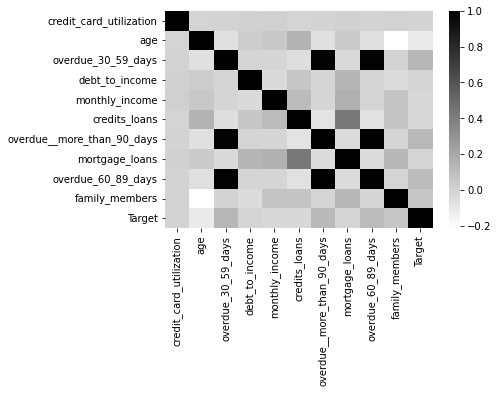

In [60]:
sns.heatmap(X_train.corr(), cmap = 'binary')

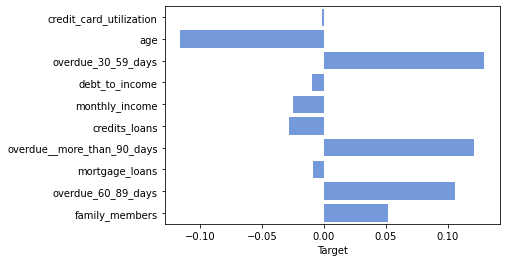

In [61]:
correlation_column = X_train.corr()['Target'][:-1]
plot = sns.barplot(y = correlation_column.index, x = correlation_column, color = 'cornflowerblue')

**Изучаем возраст**

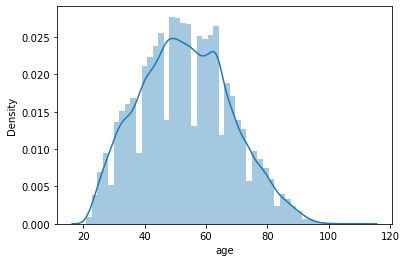

In [62]:
sns.distplot(X_train['age'])
plt.show()

Рассмотрим уникальные значения. Как мы видим, есть человек с возрастом 0, это точно ошибка. Также есть люди с очень большим возрастом, их тоже можно убрать, так как они ни на что не влияют, но увеличивают разброс значений в столбце возраста. Также рассмотрим сколько здесь пропусков.

In [63]:
X_train['age'].isna().sum()

0

In [64]:
np.sort(X_train['age'].unique())

array([ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,
        34,  35,  36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,
        47,  48,  49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,
        60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 107, 111])

In [65]:
print('Людей возраста 0:', X_train[X_train['age'] == 0]['age'].count())
print('Людей возраста больше или равно 99:', X_train[X_train['age'] >= 99]['age'].count())

Людей возраста 0: 0
Людей возраста больше или равно 99: 18


In [66]:
X_train = X_train.loc[X_train['age'] >= 18] #18, так как кредит по закону раньше нельзя брать
X_train = X_train.loc[X_train['age']<99]

Выбросили концы распределения.

**Изучаем credit_card_utilization**

In [67]:
from heapq import nlargest
nlargest(500, X_train['credit_card_utilization'])

[48779.7300231001,
 25468.42419996112,
 22283.019973145543,
 18844.4723584137,
 15579.608645085467,
 15254.61878656454,
 13339.290958915064,
 12903.45724308552,
 12717.921746076332,
 10459.556130557909,
 9727.572244245372,
 9429.40667582742,
 8779.36943941735,
 8522.7100102909,
 8139.342325364477,
 7355.38728896879,
 7312.229911669399,
 7153.909288170487,
 6609.622527651887,
 6227.607577647202,
 6098.364787185761,
 6090.989322666474,
 5676.826823159886,
 5351.590634327387,
 5302.898655660631,
 5181.127902539248,
 5037.074732319267,
 4437.554448679197,
 4297.933156785524,
 4272.040105496131,
 4251.258250044688,
 4141.205526100422,
 4138.623115883562,
 4031.005313573004,
 3963.620985130472,
 3915.745701578645,
 3548.180752063649,
 3518.8284647696723,
 3505.463088948,
 3422.863404388227,
 3336.623928276321,
 3283.265896155884,
 3274.9707422743472,
 3216.3792197006283,
 3180.3625860667344,
 3100.6777634193904,
 3078.1748489796155,
 3059.5127691076486,
 3050.4461707050496,
 3023.19114550292

In [68]:
X_train['credit_card_utilization'].isna().sum()

0

Много больших значений. Есть значения по несколько десятков тысяч, что неправдоподобно.Уберем значения, большие 6. Их относительно не так много. Пропусков нет.

In [69]:
X_train[X_train['credit_card_utilization'] >= 6]['credit_card_utilization'].count()

146

In [70]:
X_train = X_train.loc[X_train['credit_card_utilization'] < 6]

**Изучаем Overdue на экстремальные значения**

In [71]:
#Как и прежде, смотрим пропуски
print(X_train['overdue_30_59_days'].isna().sum())
print(X_train['overdue_60_89_days'].isna().sum())
print(X_train['overdue__more_than_90_days'].isna().sum())

0
0
0


In [72]:
np.sort(X_train['overdue_30_59_days'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 96, 98])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f77ca7a3eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f77ca7b2490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f77ca7a3bb0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f77ca7b2a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f77ca7b2d00>],
 'means': []}

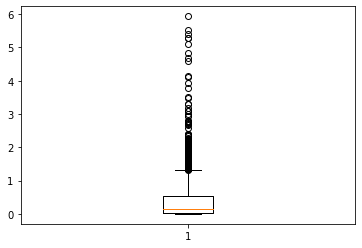

In [73]:
plt.boxplot(X_train['credit_card_utilization'])

Есть значения 96 и 98, что страно. Рассмотрим их подробно.

In [74]:
display(X_train[X_train['overdue_30_59_days'] == 96])
display(X_train[X_train['overdue_30_59_days'] == 98])

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,Target
95569,0.919807,47,96,0.049223,4209.556675,0,96,0,96,0.0,0
13145,0.901787,34,96,0.000000,3111.947063,0,96,0,96,1.0,1
40552,1.125812,26,96,0.000000,NaN,1,96,0,96,0.0,1
33792,1.202728,35,96,0.005229,4174.532762,1,96,0,96,0.0,1
32668,1.049695,29,96,0.000000,2093.017921,0,96,0,96,2.0,1


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members,Target
13362,1.054677,26,98,0.020530,2149.913622,0,98,0,98,0.0,0
43388,1.035168,49,98,0.000000,635.572017,1,98,0,98,0.0,1
97365,1.131380,26,98,0.000000,NaN,1,98,0,98,NaN,1
71634,0.902141,43,98,0.000000,NaN,1,98,0,98,0.0,1
92051,0.966968,24,98,0.000000,NaN,0,98,0,98,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
37313,1.020373,60,98,0.000000,NaN,0,98,0,98,0.0,1
21577,0.792687,42,98,0.000000,3591.912499,1,98,0,98,1.0,1
4942,1.063571,36,98,0.000000,1641.532810,1,98,0,98,1.0,0
39186,0.893989,29,98,0.000000,NaN,0,98,0,98,0.0,0


Таких больших значений довольно много, а выглядят они неправдаподобно. Уберем их.

In [75]:
X_train = X_train.loc[X_train['overdue_30_59_days'] <13]

Аналогично посмотрим другие просрочки. Как видно, тут выбросов нет.

In [76]:
np.sort(X_train['overdue_60_89_days'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11])

In [77]:
np.sort(X_train['overdue__more_than_90_days'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 12, 13])

**Изучаем debt_to_income**

Очень странно, что много людей с долгом в тысячи раз больше их дохода. Пока не очень понятно, что с этим делать. Еще проверим на пропуски.

In [78]:
X_train['debt_to_income'].isna().sum()

0

In [79]:
X_train[X_train['debt_to_income'] > 3000].shape

(2907, 11)

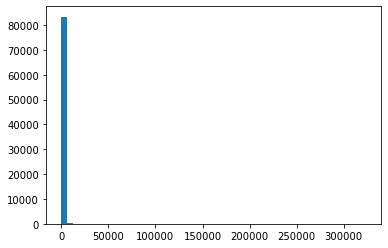

In [80]:
plt.hist(X_train['debt_to_income'], bins = 50)
plt.show()

На графике большие значения почти даже не видно. К тому же они не выглядят правдоподобными. Были попытки отсечь большие значения, но на работе модели они почти никак не отразились, а в большинстве случаев вообще качество модели ухудшалось, поэтому было принято решение оставить всё как есть.

**Изучаем monthly_income**

Проверим пропуски.

In [81]:
X_train['monthly_income'].isna().sum()

16629

Количество людей, зарабатывающих больше 100.000: 44


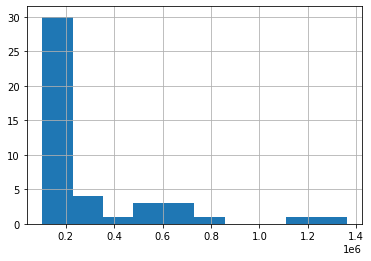

In [82]:
#Не так много богатых людей, они особо не будут влиять на модель, поэтому ничего с ними делать не будем
print('Количество людей, зарабатывающих больше 100.000:', X_train[X_train['monthly_income']>100000]['monthly_income'].count())

h = X_train[X_train['monthly_income']>100000]['monthly_income'].hist()
fig = h.get_figure()

Есть очень много пропусков. Их можно заполнить медианой/средним/нулем. В результате исследования обнаружилось, что модель работает лучше, если заполнять пропуски медианным значением.

In [83]:
median_income = X_train['monthly_income'].median()
X_train['monthly_income'] = X_train['monthly_income'].fillna(median_income)
print('Медианное значение месячного дохода:', median_income)

Медианное значение месячного дохода: 5350.081385873237


**Изучаем credits_loans**



In [84]:
print(np.sort(X_train['credits_loans'].unique()))
print('Количество людей, у которых больше 25 кредитов:', X_train[X_train['credits_loans'] >25]['credits_loans'].count())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 57 58]
Количество людей, у которых больше 25 кредитов: 737


In [85]:
X_train[X_train['credits_loans'] >25]['credits_loans'].count()

737

Есть люди, у которых очень много кредитов. Как показывает практика, это будет портить модель, поэтому, чтобы убрать выбросы, но не убирать слишком много, оставим количество кредитов меньше 26.

In [86]:
X_train = X_train[X_train['credits_loans'] <= 25]
X_train.shape

(83038, 11)

**Изучаем mortgage_loans**

Здесь ситуация ровно такая же, как и в предыдущем пункте. Только тут оставимим пороговое значение 5.

In [87]:
X_train['mortgage_loans'].unique()


array([ 0,  1,  2,  4,  3,  5,  9,  6,  7,  8, 10, 13, 11, 12, 20, 14, 17,
       15])

In [88]:
X_train[X_train['mortgage_loans'] >5]['mortgage_loans'].count()

374

In [89]:
X_train = X_train[X_train['mortgage_loans'] <= 5]
X_train.shape

(82664, 11)

**Изучаем family_members**

Есть какое-то количество значений nan. Логично предположить, что люди не указывают количество членов семьи, если их нет, поэтому заполним нулями.

In [90]:
np.sort(X_train['family_members'].unique())

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 13., 20.,
       nan])

In [91]:
X_train['family_members'].isna().sum()

2223

In [92]:
X_train['family_members'] = X_train['family_members'].fillna(0)

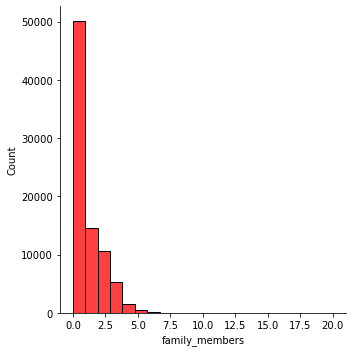

In [93]:
sns.displot(X_train['family_members'], bins = 21, color = "red")

Видно, что после 5 членов семьи мало людей, имеющих большее количество членов семьи. Поэтому можно убрать значения большие 5.

In [94]:
X_train[X_train['family_members'] >= 5]['family_members'].count()

561

In [95]:
X_train = X_train[X_train['family_members'] <= 4]
X_train.shape

(82103, 11)

In [96]:
X_train['family_members'] = X_train['family_members'].astype("int64")
#Приведем всё к типу данных int

*Теперь отбросим колонку target, которая будет y_train после этого*

In [97]:
X_train_final = X_train.drop(columns = 'Target')
y_train_final = X_train['Target']
y_train_final.value_counts()

0    76776
1     5327
Name: Target, dtype: int64

# Выбор наилучшей модели


Заполним пропущенные значения месячного дохода и количества членов семьи, как это было сделано на X_train

In [98]:
X_test.head()
X_train.shape

(82103, 11)

In [99]:
median_income_test = X_test['monthly_income'].median()
X_test['monthly_income'] = X_test['monthly_income'].fillna(median_income_test)
print('Значение медианной зарплаты:', median_income_test)

Значение медианной зарплаты: 5418.243723646463


In [100]:
X_test['family_members'] = X_test['family_members'].fillna(0)

In [101]:
X_test.isna().sum()

credit_card_utilization       0
age                           0
overdue_30_59_days            0
debt_to_income                0
monthly_income                0
credits_loans                 0
overdue__more_than_90_days    0
mortgage_loans                0
overdue_60_89_days            0
family_members                0
dtype: int64

**RandomForest**

RandomForestClassifier - модель, показавшая один из наилучших результатов. Предсказывать класс можно по predict_proba.

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Выбираем наилучшие параметры для модели.

In [102]:
parametrs_RFC = { 'n_estimators': range (10, 41, 10),
              'min_samples_leaf': range (1,4),
              'min_samples_split': range (2,6,2) }


grid_RFC = GridSearchCV(RandomForestClassifier(), parametrs_RFC, cv=5, scoring='roc_auc')
grid_RFC.fit(X_train_final, y_train_final)

grid_RFC.best_params_

{'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 40}

Создаем модель с лучшими гиперпараметрами, фитим, предиктим.

In [110]:
RFC_model = RandomForestClassifier(min_samples_leaf = 3, min_samples_split = 2, n_estimators = 40)
RFC_model.fit(X_train_final, y_train_final)
RFC_y_pred_proba = RFC_model.predict_proba(X_test)[:,1]
RFC_y_pred = RFC_model.predict(X_test)

Сохраним метрики на будущее. Посмотрим только на ROC AUC, ведь это наш основной показатель

In [163]:
#Нахождение метрик
ROC_AUC_RFC = roc_auc_score(y_test, RFC_y_pred_proba)
accuracy_RFC = accuracy_score(y_test, RFC_y_pred)
recall_RFC = recall_score(y_test, RFC_y_pred)
precision_RFC = precision_score(y_test, RFC_y_pred)
f1_RFC = f1_score(y_test, RFC_y_pred)

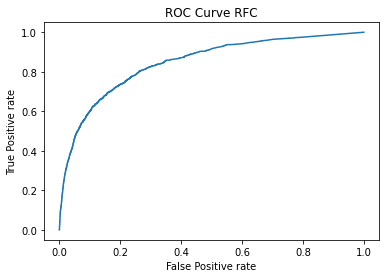

RandomForest ROC AUC = 0.8458386640290055


In [164]:
FP_RFC, TP_RFC, _ = roc_curve(y_test, RFC_y_pred_proba)
plt.title('ROC Curve RFC')
plt.plot(FP_RFC, TP_RFC)

plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

plt.show()
print('RandomForest ROC AUC =', ROC_AUC_RFC)

**HGBoost**

Данный классификатор, являющийся ускоренной версией GBClassifier, показал себя лучше всего, его и будем использовать для предсказания.

In [113]:
from sklearn.ensemble import HistGradientBoostingClassifier

Находим лучшие параметры. А дельше действуем точно так же, как и с RandomForest

In [117]:
parametrs_HGB = {'learning_rate': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2],
                'max_leaf_nodes': range (10,40,10),
                'min_samples_leaf': range (10,30,5) }


grid_HGB = GridSearchCV(HistGradientBoostingClassifier(), parametrs_HGB, cv=5, scoring='roc_auc')
grid_HGB.fit(X_train_final, y_train_final)

grid_HGB.best_params_

{'learning_rate': 0.1, 'max_leaf_nodes': 20, 'min_samples_leaf': 25}

In [168]:
HGB_model = HistGradientBoostingClassifier(learning_rate=0.08, max_leaf_nodes = 15, min_samples_leaf = 15 )
HGB_model.fit(X_train_final, y_train_final)
HGB_y_pred_proba = HGB_model.predict_proba(X_test)[:, 1]
HGB_y_pred = HGB_model.predict(X_test)

In [169]:
#Нахождение метрик
ROC_AUC_HGB = roc_auc_score(y_test, HGB_y_pred_proba)
accuracy_HGB = accuracy_score(y_test, HGB_y_pred)
recall_HGB = recall_score(y_test, HGB_y_pred)
precision_HGB = precision_score(y_test, HGB_y_pred)
f1_HGB = f1_score(y_test, HGB_y_pred)

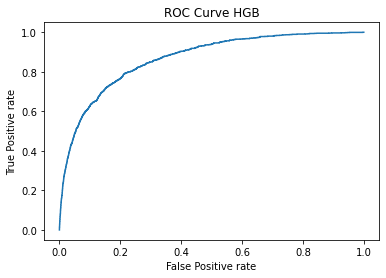

HGB ROC AUC = 0.8669991190914917


In [170]:
FP_HGB, TP_HGB, _ = roc_curve(y_test, HGB_y_pred_proba)
plt.title('ROC Curve HGB')
plt.plot(FP_HGB, TP_HGB)

plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

plt.show()
print('HGB ROC AUC =', ROC_AUC_HGB)

**KNN**

KNN показал себя в целом плохо. Отличие от других моделей в том, что нужно скейлить данные. Создаем и оцениваем модель по пайплайну, как с RandomForest.

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [24]:
SS = StandardScaler()
SS.fit(X_train_final)
X_train_final_SS = SS.transform(X_train_final)
X_test_SS = SS.transform(X_test)

In [164]:
parametrs_KNN = {'n_neighbors': range (1,10,1)}


grid_KNN = GridSearchCV(KNeighborsClassifier(), parametrs_KNN, cv=5, scoring='roc_auc')
grid_KNN.fit(X_train_final_SS, y_train_final)

grid_KNN.best_params_

{'n_neighbors': 9}

In [25]:
KNN_model = KNeighborsClassifier(n_neighbors = 9)
KNN_model.fit(X_train_final_SS, y_train_final)
KNN_y_pred_proba = KNN_model.predict_proba(X_test_SS)[:, 1]
KNN_y_pred = KNN_model.predict(X_test_SS)

In [26]:
#Нахождение метрик
ROC_AUC_KNN = roc_auc_score(y_test, KNN_y_pred_proba)
accuracy_KNN = accuracy_score(y_test, KNN_y_pred)
recall_KNN = recall_score(y_test, KNN_y_pred)
precision_KNN = precision_score(y_test, KNN_y_pred)
f1_KNN = f1_score(y_test, KNN_y_pred)

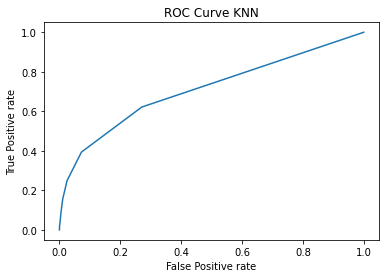

KNN ROC AUC = 0.711056018170742


In [27]:
FP_KNN, TP_KNN, _ = roc_curve(y_test, KNN_y_pred_proba)
plt.title('ROC Curve KNN')
plt.plot(FP_KNN, TP_KNN)

plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

plt.show()
print('KNN ROC AUC =', ROC_AUC_KNN)

**Logistic Regression**

Логистическая регрессия показала себя нормально, но хуже RF и градиентного бустинга. Создаем и оцениваем модель по пайплайну, как с RandomForest.

In [54]:
from sklearn.linear_model import LogisticRegression

In [185]:
parametrs_LR = { 'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                'C': [0.1, 0.2, 0.4, 0.6, 0.8, 1] }


grid_LR = GridSearchCV(LogisticRegression(), parametrs_LR, cv=5, scoring='roc_auc')
grid_LR.fit(X_train_final, y_train_final)

grid_LR.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [55]:
LR_model = LogisticRegression(C=0.1, penalty = 'l2')
LR_model.fit(X_train_final, y_train_final)
LR_y_pred_proba = LR_model.predict_proba(X_test)[:, 1]
LR_y_pred = LR_model.predict(X_test)

In [56]:
#Нахождение метрик
ROC_AUC_LR = roc_auc_score(y_test, LR_y_pred_proba)
accuracy_LR = accuracy_score(y_test, LR_y_pred)
recall_LR = recall_score(y_test, LR_y_pred)
precision_LR = precision_score(y_test, LR_y_pred)
f1_LR = f1_score(y_test, LR_y_pred)

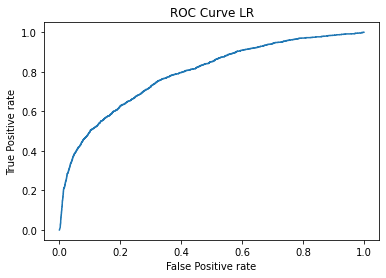

LR ROC AUC = 0.7904598914911507


In [57]:
FP_LR, TP_LR, _ = roc_curve(y_test, LR_y_pred_proba)
plt.title('ROC Curve LR')
plt.plot(FP_LR, TP_LR)

plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

plt.show()
print('LR ROC AUC =', ROC_AUC_LR)

array([[0.99336465, 0.00663535],
       [0.96111991, 0.03888009],
       [0.95850712, 0.04149288],
       ...,
       [0.9867905 , 0.0132095 ],
       [0.89658266, 0.10341734],
       [0.80662197, 0.19337803]])

In [62]:
(LR_model.predict_proba(X_test)[1] > 0.5).sum()

1

In [60]:
LR_model.predict(X_test).sum()

471

**XGboost**

Рассмотрим работу XGBoost с разными бустерами. Можно выбрать gbtree/dart, которые используют модели, основанные на решающих деревьях, либо gblinear, который использует линейные модели. Далее, создаем и оцениваем модель по пайплайну, как с RandomForest.

In [33]:
!pip install --upgrade xgboost
from xgboost import XGBClassifier

In [135]:
XGBR_1 = XGBClassifier(booster = 'gbtree')
XGBR_1.fit(X_train_final, y_train_final)
XGBR_1_y_pred_proba = XGBR_1.predict_proba(X_test)[:,1]
XGBR_1_y_pred = XGBR_1.predict(X_test)

In [136]:
ROC_AUC_XGBR_1 = roc_auc_score(y_test, XGBR_1_y_pred_proba)
print(ROC_AUC_XGBR_1)

0.8579073148372168


In [137]:
XGBR_2 = XGBClassifier(booster = 'gblinear')
XGBR_2.fit(X_train_final, y_train_final)
XGBR_2_y_pred_proba = XGBR_2.predict_proba(X_test)[:,1]
XGBR_2_y_pred = XGBR_2.predict(X_test)

In [138]:
ROC_AUC_XGBR_2 = roc_auc_score(y_test, XGBR_2_y_pred_proba)
print(ROC_AUC_XGBR_2)

0.8568885045882921


In [139]:
XGBR_3 = XGBClassifier(booster = 'dart')
XGBR_3.fit(X_train_final, y_train_final)
XGBR_3_y_pred_proba = XGBR_3.predict_proba(X_test)[:,1]
XGBR_3_y_pred = XGBR_3.predict(X_test)

In [140]:
ROC_AUC_XGBR_3 = roc_auc_score(y_test, XGBR_3_y_pred_proba)
print(ROC_AUC_XGBR_3)

0.8579073148372168


In [141]:
best = np.argmax([ROC_AUC_XGBR_1, ROC_AUC_XGBR_2, ROC_AUC_XGBR_3])
best_pred = [XGBR_1_y_pred, XGBR_2_y_pred, XGBR_3_y_pred][best]
XGBR_best_y_pred_proba = [XGBR_1_y_pred_proba,XGBR_2_y_pred_proba,XGBR_3_y_pred_proba][best]

In [142]:
#Нахождение метрик самого наилучшего - linear
ROC_AUC_XGBR = [ROC_AUC_XGBR_1, ROC_AUC_XGBR_2, ROC_AUC_XGBR_3][best]
accuracy_XGBR = accuracy_score(y_test, best_pred)
recall_XGBR = recall_score(y_test, best_pred)
precision_XGBR = precision_score(y_test, best_pred)
f1_XGBR = f1_score(y_test, best_pred)

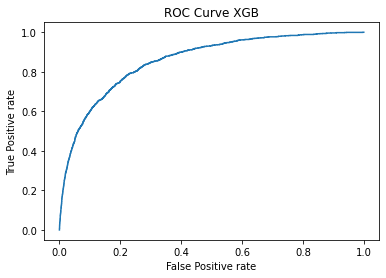

XGB ROC AUC = 0.8579073148372168


In [143]:
FP_XGBR, TP_XGBR, _ = roc_curve(y_test, XGBR_best_y_pred_proba)
plt.title('ROC Curve XGB')
plt.plot(FP_XGBR, TP_XGBR)

plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')

plt.show()
print('XGB ROC AUC =', ROC_AUC_XGBR)

***Рассмотрим метрики разных моделей в сравнении***

In [50]:
ROC_AUCs = [ROC_AUC_RFC, ROC_AUC_HGB, ROC_AUC_KNN, ROC_AUC_LR, ROC_AUC_XGBR]
precisions = [precision_RFC, precision_HGB, precision_KNN, precision_LR, precision_XGBR]
recalls = [recall_RFC, recall_HGB, recall_KNN, recall_LR, recall_XGBR]
f1s = [f1_RFC, f1_HGB, f1_KNN, f1_LR, f1_XGBR]
accuracys = [accuracy_RFC, accuracy_HGB, accuracy_KNN, accuracy_LR, accuracy_XGBR]

In [51]:
models_compare = pd.DataFrame(columns = ['RFC','HGB','KNN','LR','XGBR'],
                              data = [ROC_AUCs, precisions,recalls,f1s, accuracys],
                              index = ['ROC AUC','Precision','Recall','f1','Accuracy'])
models_compare

,RFC,HGB,KNN,LR,XGBR
ROC AUC,0.849604,0.865825,0.711056,0.665743,0.857990
Precision,0.587838,0.621429,0.542986,0.641026,0.562130
Recall,0.191771,0.191771,0.088170,0.018369,0.209405
f1,0.289197,0.293094,0.151707,0.035714,0.305139
Accuracy,0.938969,0.940110,0.936162,0.935782,0.938255


Мы максимизируем ROC AUC, соответсвенно, лучше всего подходит модель HistGradientBoostingClassifier.

# Редактирование всего целого датасета для построения финальной модели

Считываем весь датасет, теперь его не делим на train и test

In [393]:
X_all = pd.read_csv('X_train.csv')
y_all = pd.read_csv('y_train.csv')

X_all['Target'] = y_all

**Далее проводим такую же обработку данных, как это было сделано выше**

In [394]:
#возраст
X_all = X_all.loc[X_all['age'] >= 18]
X_all = X_all.loc[X_all['age']<99]

#credit card utilization
X_all = X_all.loc[X_all['credit_card_utilization'] < 6]

#overdue
X_all = X_all.loc[X_all['overdue_30_59_days'] <15]

#месячный доход
median_income_all = X_all['monthly_income'].median()
X_all['monthly_income'] = X_all['monthly_income'].fillna(median_income_all)

#credit loans
X_all = X_all[X_all['credits_loans'] <= 25]

#mortgage loans
X_all = X_all[X_all['mortgage_loans'] <= 5]

#family members
X_all['family_members'] = X_all['family_members'].fillna(0)
X_all['family_members'] = X_all['family_members'].astype("int64")
X_all = X_all[X_all['family_members'] <= 3]

In [395]:
X_all_final = X_all.drop(columns = 'Target')
y_all_final = X_all['Target']
y_all_final.value_counts()

0    94166
1     6472
Name: Target, dtype: int64

# Финальное предсказание и выгрузка результатов

Считаем данные x_test и y_test

In [396]:
X_test_kaggle = pd.read_csv('X_test.csv')
X_test_kaggle.drop(columns = 'index', inplace = True)

y_test_kaggle = pd.read_csv('y_test_sample.csv')

**Будем использовать HistGradientBoostingClassifier**

In [256]:
parametrs_HGB = { 'learning_rate': [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2],
                'max_leaf_nodes': range (10,40,10),
                'min_samples_leaf': range (10,30,5) }


grid_HGB = GridSearchCV(HistGradientBoostingClassifier(), parametrs_HGB, cv=5, scoring='roc_auc')
grid_HGB.fit(X_train_final, y_train_final)

grid_HGB.best_params_

{'learning_rate': 0.1, 'max_leaf_nodes': 20, 'min_samples_leaf': 20}

In [397]:
HGB_model_all = HistGradientBoostingClassifier(learning_rate = 0.1, max_leaf_nodes = 20, min_samples_leaf = 20)
HGB_model_all.fit(X_all_final, y_all_final)
HGB_y_pred_all_proba = HGB_model_all.predict_proba(X_test_kaggle)[:, 1]

**Сохраним полученные данные в файл csv**

In [398]:
#from google.colab import files
y_test_kaggle['target'] = HGB_y_pred_all_proba
y_test_kaggle.to_csv('Results.csv', index = False) 